In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
from functools import partial
from multiprocessing import Pool

from fastdtw import fastdtw, dtw
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix 
from custom.graphics import plot_context

# ABBV

In [12]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["ABBV"]:
    data.append(podatak)

In [13]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y1 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y1_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [14]:
kernel_train = np.load("kernel_train_univariant_ABBV.npy")

In [15]:
kernel_test = np.load("kernel_test_univariant_ABBV.npy")

In [16]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y1)
#train
res1_train = clf.predict(kernel)
print('accuracy train: ', np.mean(res1_train == Y1))
print('AUC train:', roc_auc_score(Y1, res1_train))
#test
res1_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res1_test == Y1_test))
print('AUC test:', roc_auc_score(Y1_test, res1_test))

accuracy train:  0.7580993520518359
AUC train: 0.7580515748619197
accuracy test:  0.7306034482758621
AUC test: 0.731268239186602


# GOOGL

In [19]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["GOOGL"]:
    data.append(podatak)

In [20]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y2 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y2_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [21]:
kernel_train = np.load("kernel_train_univariant_GOOGL.npy")

In [22]:
kernel_test = np.load("kernel_test_univariant_GOOGL.npy")

In [24]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y2)
#train
res2_train = clf.predict(kernel)
print('accuracy train: ', np.mean(res2_train == Y2))
print('AUC train:', roc_auc_score(Y2, res2_train))
#test
res2_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res2_test == Y2_test))
print('AUC test:', roc_auc_score(Y2_test, res2_test))

accuracy train:  0.755939524838013
AUC train: 0.7553745381256298
accuracy test:  0.7262931034482759
AUC test: 0.7240462556704098


# HP

In [42]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["HP"]:
    data.append(podatak)

In [43]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y3 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y3_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [44]:
kernel_train = np.load("kernel_train_univariant_HP.npy")

In [45]:
kernel_test = np.load("kernel_test_univariant_HP.npy")

In [46]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y3)
#train
#res2_train = clf.predict(kernel)
#print('accuracy train: ', np.mean(res2_train == Y2))
#print('AUC train:', roc_auc_score(Y2, res2_train))
#test
res3_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res3_test == Y3_test))
print('AUC test:', roc_auc_score(Y3_test, res3_test))

accuracy test:  0.7974137931034483
AUC test: 0.7976108516457957


# KO

In [34]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["KO"]:
    data.append(podatak)

In [35]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y4 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y4_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [36]:
kernel_train = np.load("kernel_train_univariant_KO.npy")

In [37]:
kernel_test = np.load("kernel_test_univariant_KO.npy")

In [40]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y4)
res4_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res4_test == Y4_test))
print('AUC test:', roc_auc_score(Y4_test, res4_test))

accuracy test:  0.7629310344827587
AUC test: 0.7604166666666666


# NKE

In [48]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["NKE"]:
    data.append(podatak)

In [49]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y5 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y5_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [50]:
kernel_train = np.load("kernel_train_univariant_NKE.npy")

In [51]:
kernel_test = np.load("kernel_test_univariant_NKE.npy")

In [52]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y5)
res5_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res5_test == Y5_test))
print('AUC test:', roc_auc_score(Y5_test, res5_test))

accuracy test:  0.7349137931034483
AUC test: 0.7347234611953612


# F

In [55]:
reduced = pd.read_csv("reduced.csv", index_col="date")
d = reduced.apply(np.log).diff()[1:]
data = []
for podatak in d["F"]:
    data.append(podatak)

In [56]:
L = len(data)
l = 20
s = 1

X = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y6 = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2 - l - s)]).astype(np.float32)

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])
Y6_test = np.stack([data[i + l + s - 1] > data[i + l - 1] for i in range(L // 2, L - l - s)]).astype(np.float32)

In [57]:
kernel_train = np.load("kernel_train_univariant_F.npy")

In [58]:
kernel_test = np.load("kernel_test_univariant_F.npy")

In [59]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
clf.fit(kernel, Y6)
res6_test = clf.predict(testkernel) 
print('accuracy test: ', np.mean(res6_test == Y6_test))
print('AUC test:', roc_auc_score(Y6_test, res6_test))

accuracy test:  0.7327586206896551
AUC test: 0.7327586206896551


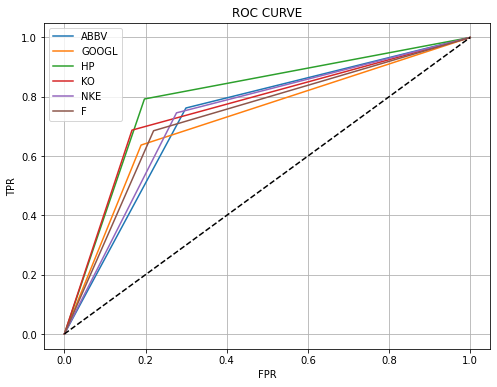

AUC ABBV: 0.731268239186602
AUC GOOGL: 0.7240462556704098
AUC HP: 0.7976108516457957
AUC KO: 0.7604166666666666
AUC NKE: 0.7347234611953612


In [60]:
with plot_context(show=True, grid=True, title="ROC CURVE", xlabel="FPR", ylabel="TPR", legend=["ABBV", "GOOGL", "HP", "KO", "NKE", "F"]):
    fpr, tpr, _ = roc_curve(Y1_test, res1_test)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y2_test, res2_test)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y3_test, res3_test)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y4_test, res4_test)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y5_test, res5_test)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y6_test, res6_test)
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], "k--", label="_nolegend_")
print('AUC ABBV:', roc_auc_score(Y1_test, res1_test))
print('AUC GOOGL:', roc_auc_score(Y2_test, res2_test))
print('AUC HP:', roc_auc_score(Y3_test, res3_test))
print('AUC KO:', roc_auc_score(Y4_test, res4_test))
print('AUC NKE:', roc_auc_score(Y5_test, res5_test))